<a href="https://colab.research.google.com/github/andrej-fjodorov/Diabet_prediction/blob/main/%D0%9F%D1%80%D0%BE%D0%BC%D0%B5%D0%B6%D1%83%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B0%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Подключение библиотек

---



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.backends.backend_pdf as pdf_backend


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import GridSearchCV



from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC




#from sklearn.linear_model import Ridge, Lasso
#from sklearn.model_selection import cross_val_score



Загрузка файла на диск

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
file_path = '/content/drive/MyDrive/diabetes.csv'


In [19]:
df = pd.read_csv(file_path)

Вывод содержимого датафрейма

In [20]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
print(f"В датасете: {X.shape[0]} строк")

# Information about columns and data types
print(f"\n В датасете {X.shape[1]} столбцов, из них :")
print(X.dtypes.value_counts())

В датасете: 768 строк

 В датасете 8 столбцов, из них :
int64      6
float64    2
Name: count, dtype: int64


Посмотрим тип переменных в датасете

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Проверим основные статистические показатели

In [23]:
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Аанализ пропущенных значений

In [24]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

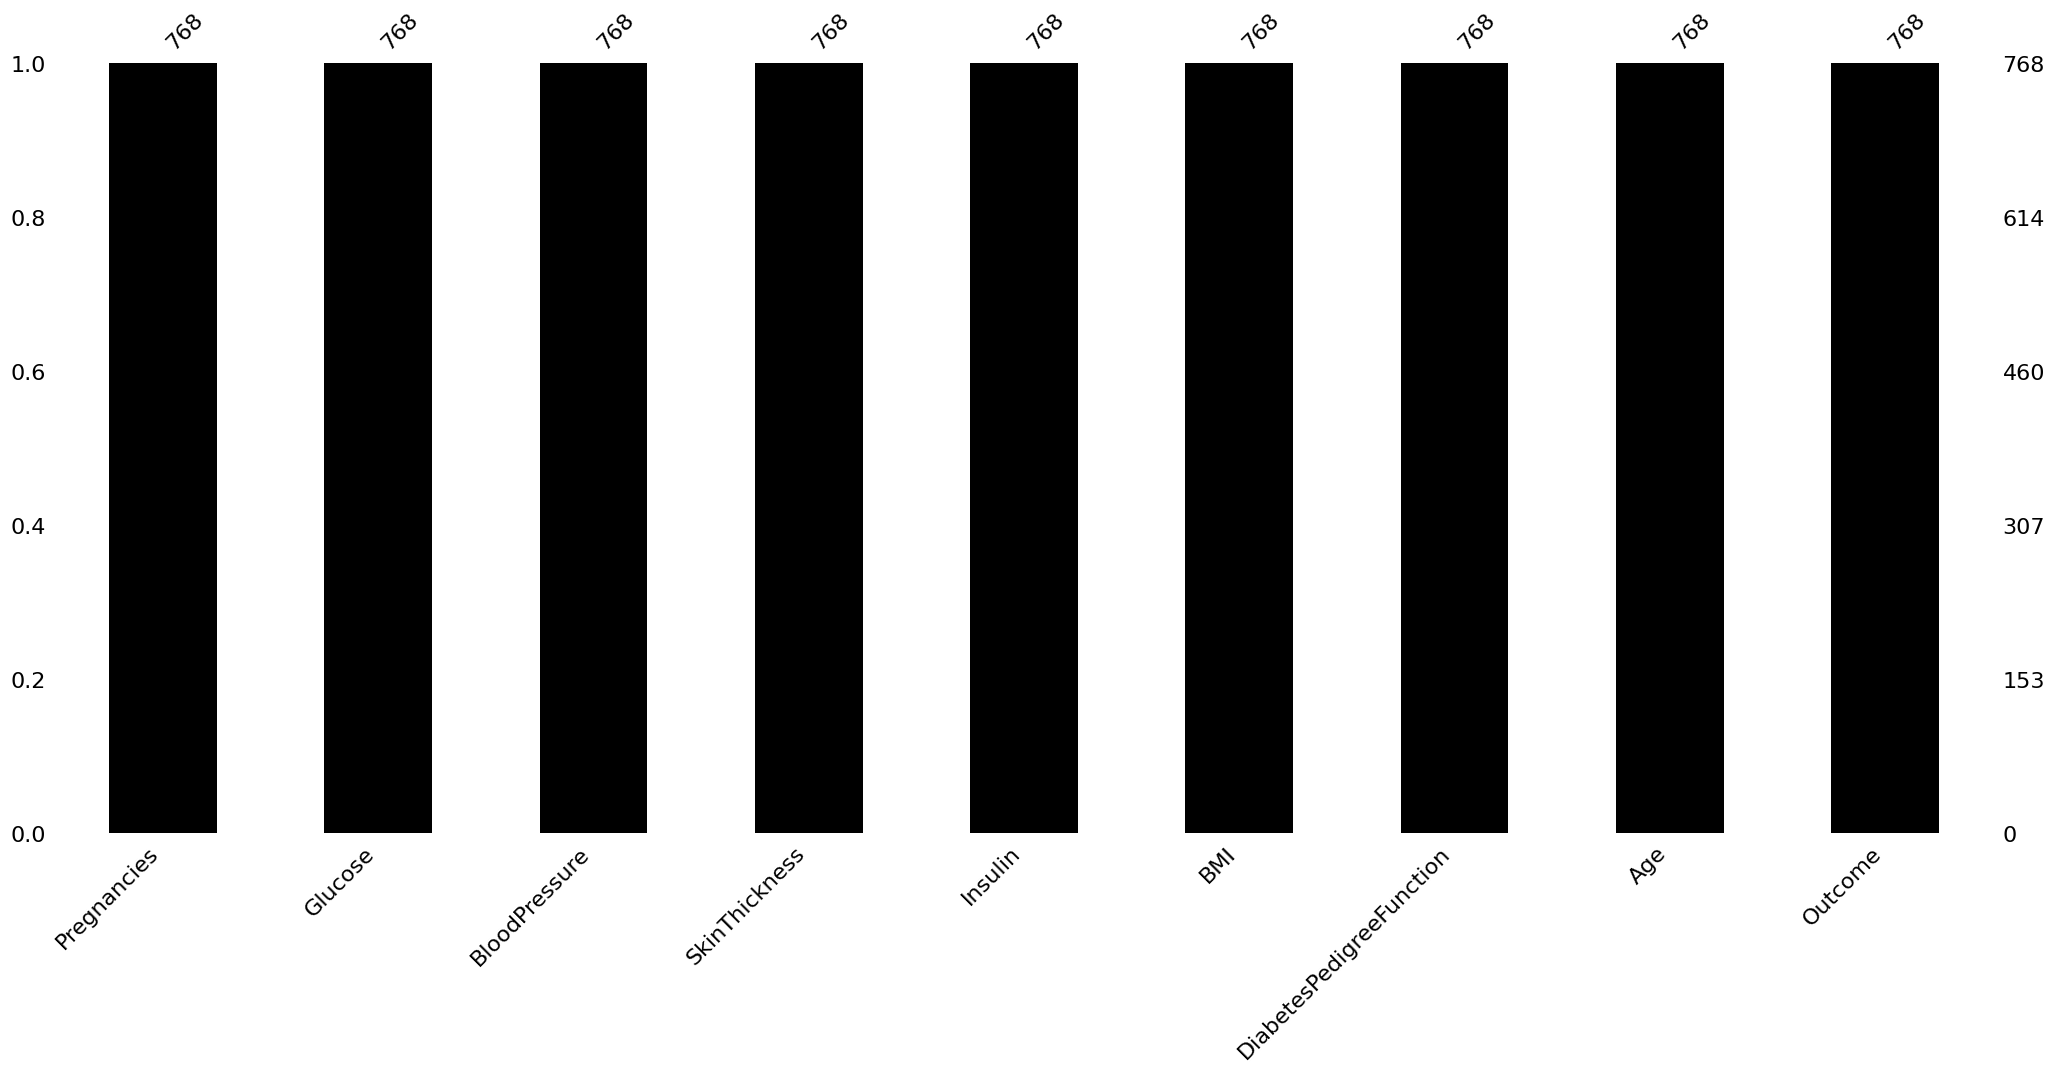

In [25]:
import missingno
import matplotlib.pyplot as plt
missingno.bar(df, color = 'black')
plt.show()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

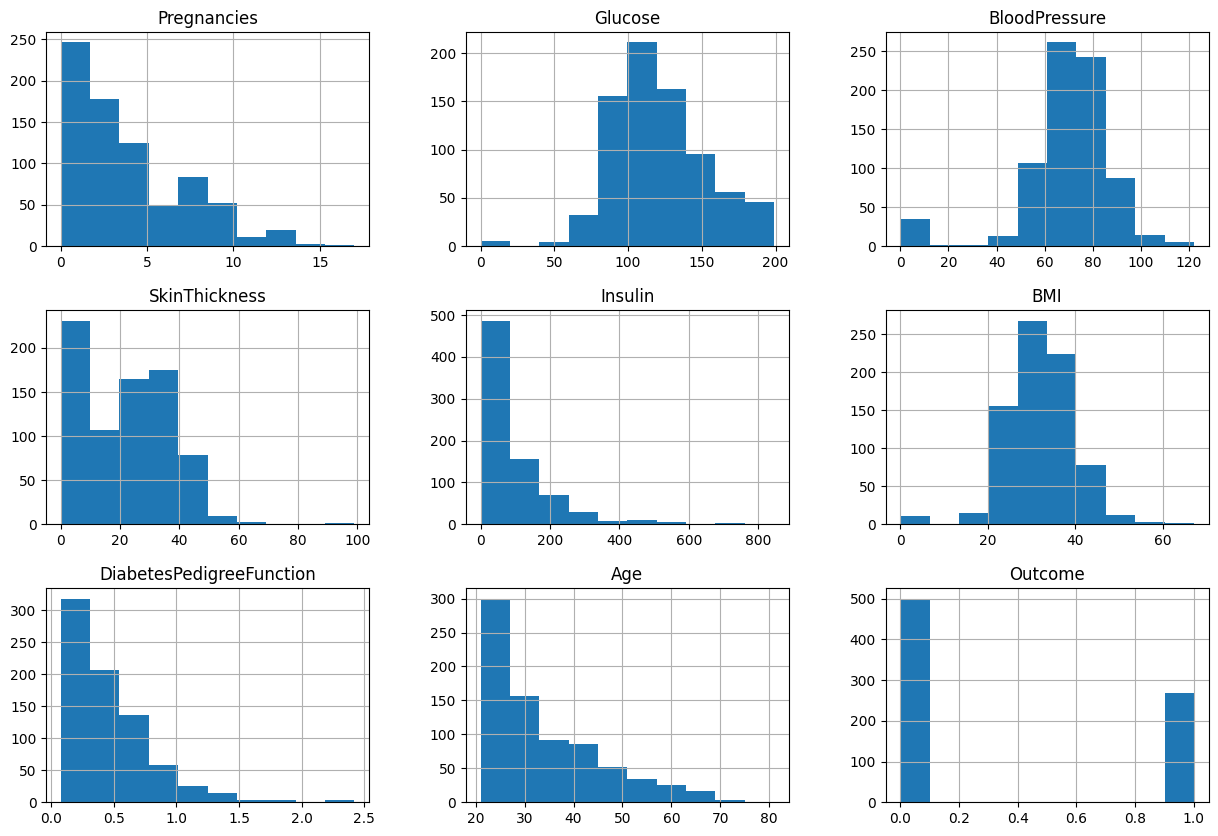

In [26]:
df.hist(figsize=(15, 10))

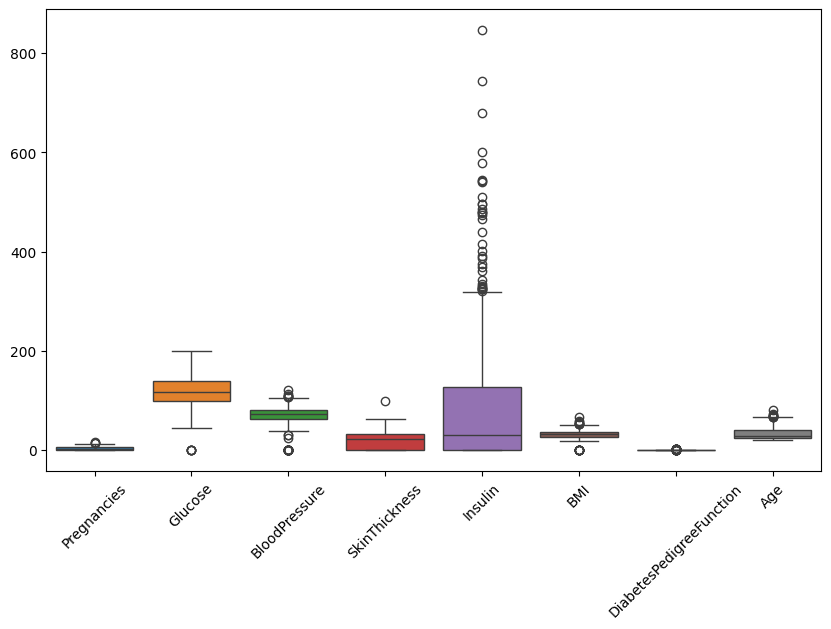

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.show()

In [66]:
# распределение целевой
print("\nTarget Class Distribution:")
pd.Series(y).value_counts()


Target Class Distribution:


0    534
1    234
Name: count, dtype: int64

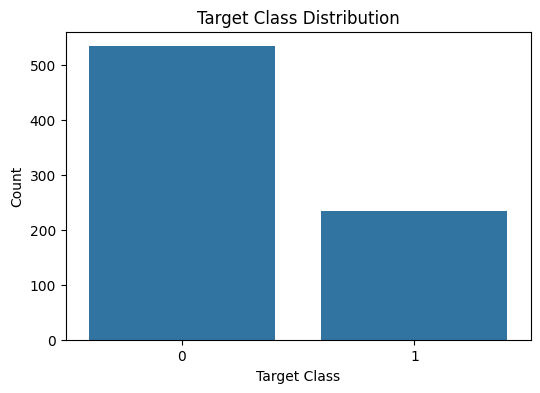

In [67]:
plt.figure(figsize=(6, 4))
sns.countplot(x=pd.Series(y))
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Target Class Distribution')
plt.show()

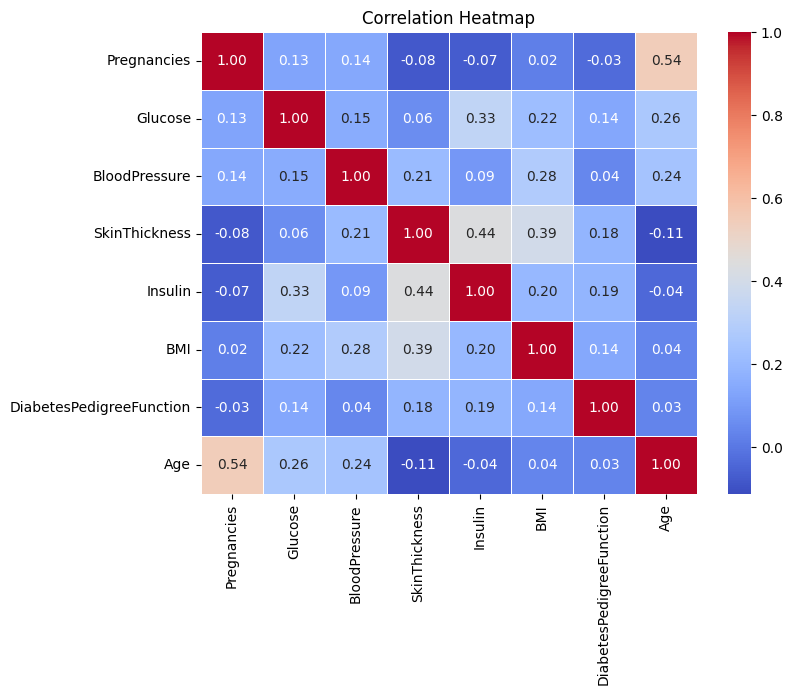

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [31]:
def calculate_metrics_and_plot_roc(model, X_train, y_train, X_test, y_test):
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на обучающей и тестовой выборке
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Расчет метрик precision и recall
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)

    print(f"Training Precision: {train_precision:.2f}")
    print(f"Training Recall: {train_recall:.2f}")
    print(f"Test Precision: {test_precision:.2f}")
    print(f"Test Recall: {test_recall:.2f}")

    metrics =  {'params': ['Training_Precision', 'Test_Precision','Training_Recall', 'Test_Recall'],
                'values': [train_precision, test_precision, train_recall, test_recall]}

    # Расчет ROC-AUC на тестовой выборке
    try:
      pred_test = model.predict_proba(X_test)
      pred_train = model.predict_proba(X_train)
      roc_auc_test = roc_auc_score(y_test, pred_test[:, 1])
      roc_auc_train = roc_auc_score(y_train, pred_train[:, 1])
      print(f"ROC-AUC_test = : {roc_auc_test:.2f} и ROC-AUC_train = : {roc_auc_train:.2f}")

      # Построение кривой ROC
      fpr_test, tpr_test, _ = roc_curve(y_test, pred_test[:, 1])
      fpr_train, tpr_train, _ = roc_curve(y_train, pred_train[:, 1])
      plt.figure()
      plt.plot(fpr_test, tpr_test, color='blue', lw=2, label = 'ROC Curve test')
      plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label = 'ROC Curve test')
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.legend()
      plt.title(f'ROC Curve ({type(model).__name__})')
      plt.show()
    except Exception as e:
      print(e)
    return metrics

Модель линейной регрессии

In [32]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [34]:
liner_model  = LinearRegression()

In [35]:
liner_model.fit(X, y)

LinearRegression()

In [36]:
y_pred = liner_model.predict(X_test)

In [37]:
print(y_pred[:5])

[0.36717085 1.01347921 0.72846139 0.44290532 0.13811627]


In [ ]:
liner_model.score(X, y)

0.303253095650892

KNN

In [38]:
#подготовка тестового и тренировочного наборов данных
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=12345)

In [39]:
#подключение классификатора KNN
n_neighbors=5

#knn_model = KNeighborsClassifier(n_neighbors = n_neighbors)
knn_model=KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train,y_train)

score = knn_model.score(X_test,y_test)
print("The accuracy is ",score*100)

The accuracy is  3.901336477987405


In [40]:
y_pred = knn_model.predict(X_test)
y_pred == y_test

68      True
308    False
375    False
498     True
188    False
       ...  
438     True
328    False
184    False
365     True
597     True
Name: Outcome, Length: 154, dtype: bool

In [41]:
n_neighbors=3

knn_model = KNeighborsClassifier(n_neighbors = n_neighbors)
knn_model.fit(X_train,y_train)

score = knn_model.score(X_test,y_test)
print("The accuracy is ",score*100)

The accuracy is  73.37662337662337


In [42]:

# Создание списка значений k, которые вы хотите оценить
k_values = [3, 5, 7, 9, 10, 11, 20]

# Инициализация списка для сохранения средних оценок точности для каждого значения k
mean_scores = []

# Перебор значений k
for k in k_values:
    # Создание модели k-ближайших соседей
    knn = KNeighborsClassifier(n_neighbors=k)

    # Вычисление средней оценки точности с использованием перекрестной проверки
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # cv=5 означает 5-кратную перекрестную проверку
    mean_scores.append(np.mean(scores))

# Вывод результатов
for k, score in zip(k_values, mean_scores):
    print("k =", k, "Mean Accuracy:", score)

k = 3 Mean Accuracy: 0.7135557253204311
k = 5 Mean Accuracy: 0.723979288685171
k = 7 Mean Accuracy: 0.7357185298361768
k = 9 Mean Accuracy: 0.7422120363296834
k = 10 Mean Accuracy: 0.7448009506833035
k = 11 Mean Accuracy: 0.748731007554537
k = 20 Mean Accuracy: 0.7487734487734488


Training Precision: 0.79
Training Recall: 0.75
Test Precision: 0.59
Test Recall: 0.46
ROC-AUC_test = : 0.71 и ROC-AUC_train = : 0.91


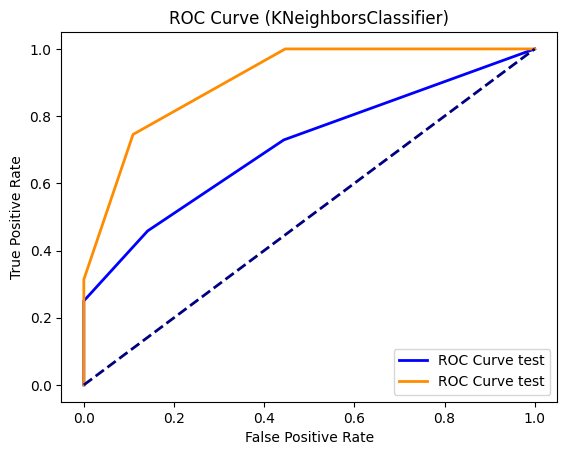

In [43]:
knn_metrics = calculate_metrics_and_plot_roc(knn_model, X_train, y_train, X_test, y_test)

Дерево решений

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=15
)

dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=15)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=15)

In [45]:
# Получение предсказанных меток классов на тестовой выборке
y_pred_test = dt_classifier.predict(X_test)
y_pred_train = dt_classifier.predict(X_train)
# Вычисление точности
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train, accuracy_test

(0.7802607076350093, 0.7186147186147186)

In [46]:
text_representation = export_text(dt_classifier)
print(text_representation)

|--- feature_1 <= 122.50
|   |--- feature_7 <= 30.50
|   |   |--- feature_6 <= 0.68
|   |   |   |--- class: 0
|   |   |--- feature_6 >  0.68
|   |   |   |--- class: 0
|   |--- feature_7 >  30.50
|   |   |--- feature_5 <= 26.95
|   |   |   |--- class: 0
|   |   |--- feature_5 >  26.95
|   |   |   |--- class: 0
|--- feature_1 >  122.50
|   |--- feature_1 <= 154.50
|   |   |--- feature_5 <= 29.95
|   |   |   |--- class: 0
|   |   |--- feature_5 >  29.95
|   |   |   |--- class: 1
|   |--- feature_1 >  154.50
|   |   |--- feature_4 <= 252.00
|   |   |   |--- class: 1
|   |   |--- feature_4 >  252.00
|   |   |   |--- class: 1



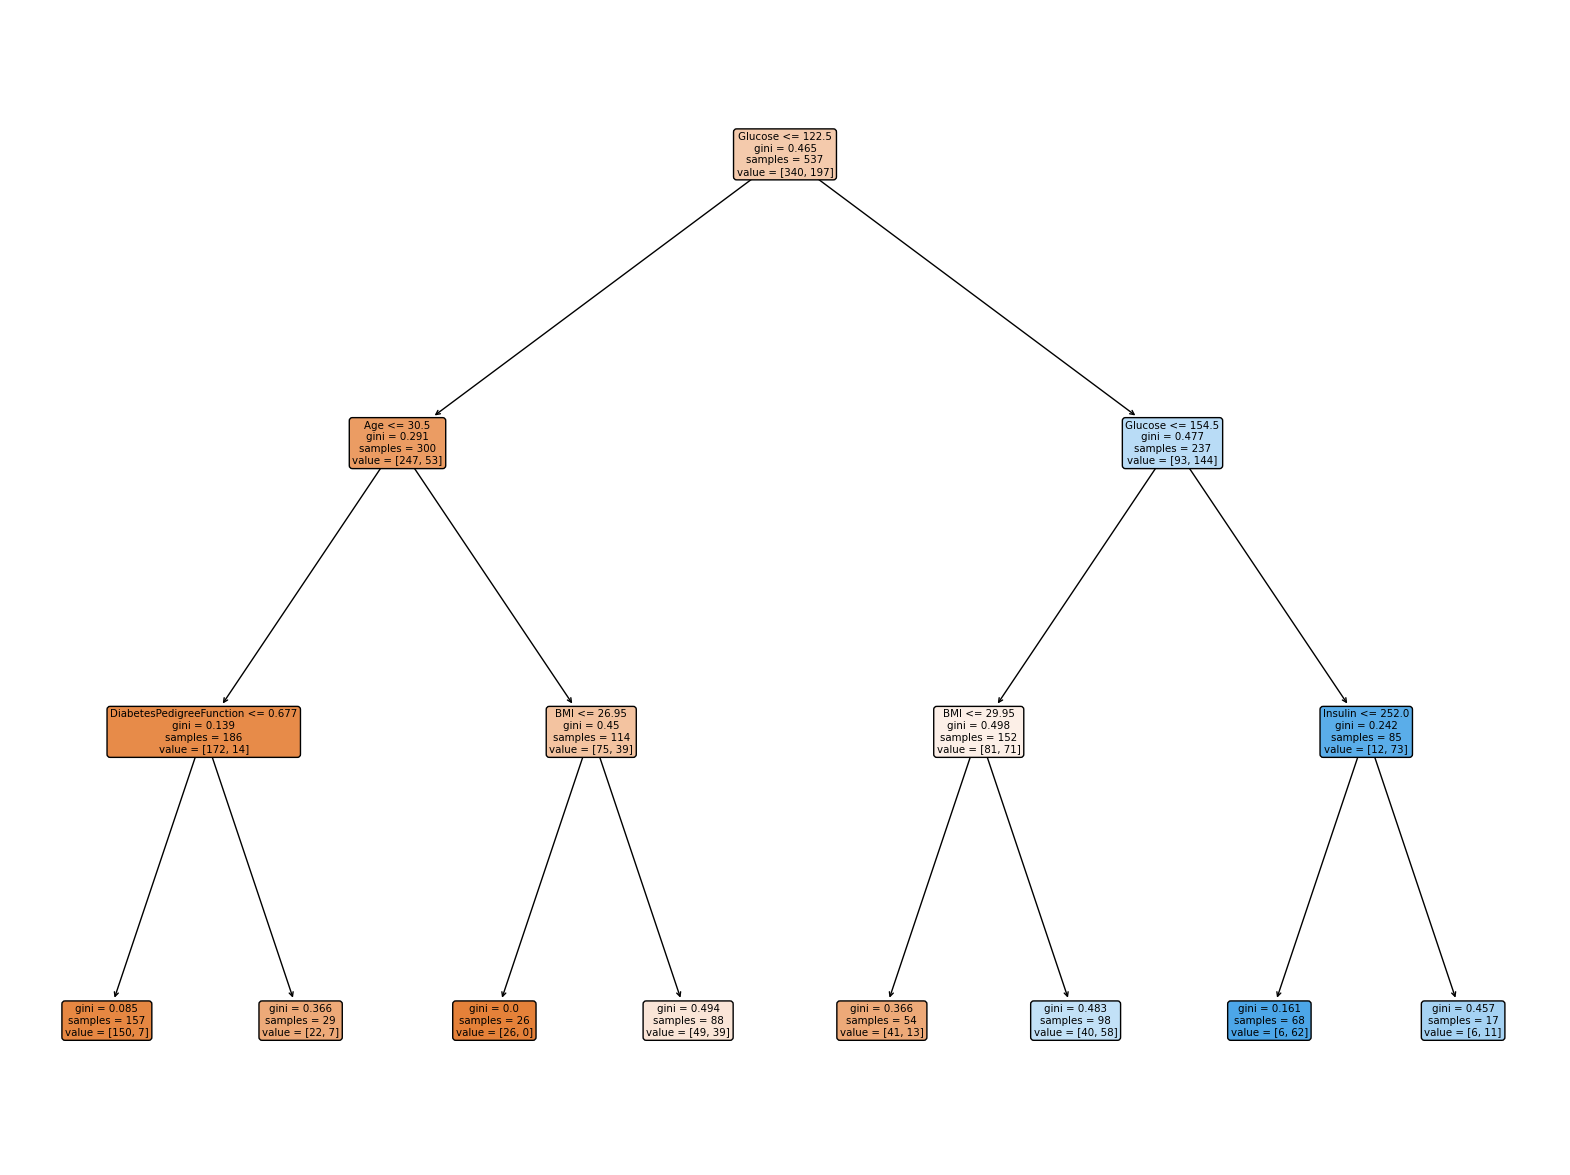

In [47]:
plt.figure(figsize=(20, 15))
plot_tree(dt_classifier, feature_names=X.columns, filled=True, rounded=True)
plt.show()

Training Precision: 0.72
Training Recall: 0.66
Test Precision: 0.54
Test Recall: 0.59
ROC-AUC_test = : 0.74 и ROC-AUC_train = : 0.86


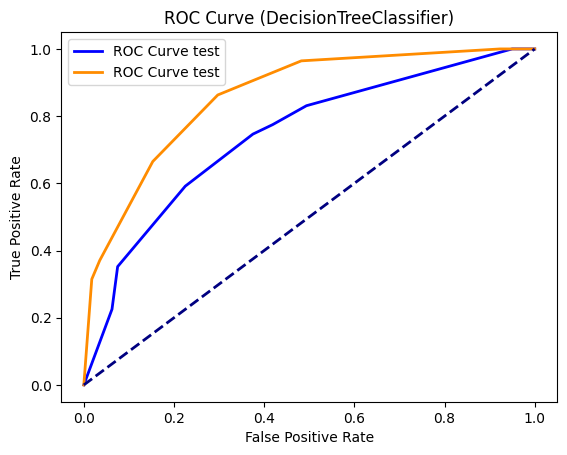

In [48]:
dt_classifier_metrics = calculate_metrics_and_plot_roc(dt_classifier, X_train, y_train, X_test, y_test)

Случайный лес

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [51]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7272727272727273


Training Precision: 1.00
Training Recall: 1.00
Test Precision: 0.60
Test Recall: 0.69
ROC-AUC_test = : 0.82 и ROC-AUC_train = : 1.00


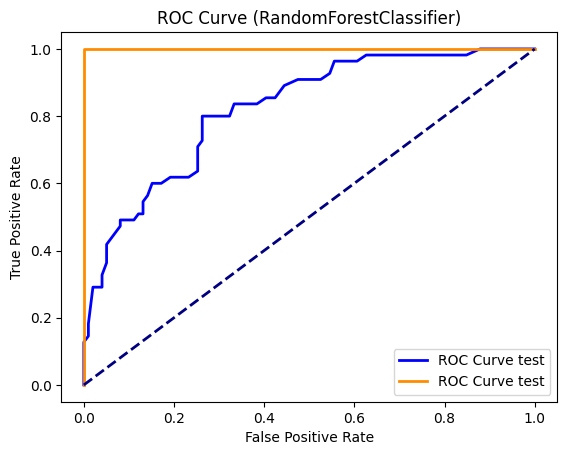

In [52]:
rf_model_metrics = calculate_metrics_and_plot_roc(rf_model, X_train, y_train, X_test, y_test)

Градиетный бустинг

In [53]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [54]:
GB_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=10)


In [55]:
GB_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=10)

In [56]:
y_pred = GB_model.predict(X_train)


In [57]:
y = GB_model.predict(X)

In [58]:
accuracy = accuracy_score(y_train,y_pred)


In [59]:
print("Accuracy:", accuracy)

Accuracy: 0.9267100977198697


Training Precision: 0.94
Training Recall: 0.84
Test Precision: 0.78
Test Recall: 0.61
ROC-AUC_test = : 0.83 и ROC-AUC_train = : 0.98


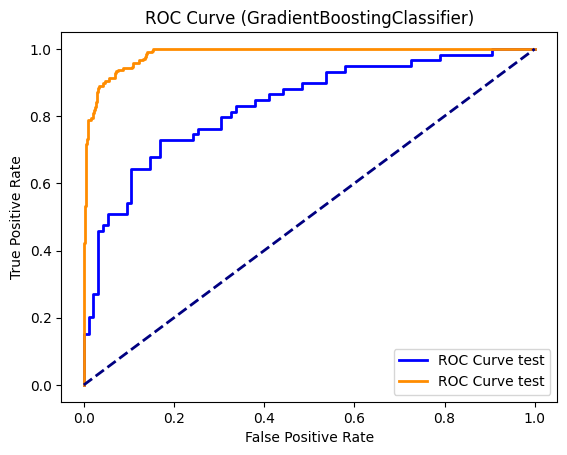

In [60]:
GB_model_metrics = calculate_metrics_and_plot_roc(GB_model, X_train, y_train, X_test, y_test)

Вывод: лучше всего для машинного обучения подходит алгоритм градиентного бустинга,так как скорость обучения модели составляет 94%

In [61]:
knn_metrics['metrics'] = ['knn_metrics' for i in range(4)]
dt_classifier_metrics['metrics'] = ['dt_classifier_metrics' for i in range(4)]
rf_model_metrics['metrics'] = ['rf_model_metrics' for i in range(4)]
GB_model_metrics['metrics'] = ['GB_model_metrics' for i in range(4)]

In [62]:
df_stat = pd.concat([pd.DataFrame(knn_metrics),
                    pd.DataFrame(dt_classifier_metrics),
                    pd.DataFrame(rf_model_metrics),
                    pd.DataFrame(GB_model_metrics)
])

In [63]:
df_stat = df_stat.pivot_table(columns = 'params',
                            index='metrics',
                            values='values').reset_index()[['metrics','Test_Precision',	'Training_Precision',
                                                            'Test_Recall',	'Training_Recall']]
df_stat['dif_Precision'] = round((df_stat['Test_Precision'] - df_stat['Training_Precision'])/df_stat['Training_Precision'],2)

df_stat['dif_Recall'] = round((df_stat['Test_Recall'] - df_stat['Training_Recall'])/df_stat['Training_Recall'],2)
df_stat

params,metrics,Test_Precision,Training_Precision,Test_Recall,Training_Recall,dif_Precision,dif_Recall
0,GB_model_metrics,0.782609,0.936170,0.610169,0.842105,-0.16,-0.28
1,dt_classifier_metrics,0.538462,0.715847,0.591549,0.664975,-0.25,-0.11
2,knn_metrics,0.594595,0.792271,0.458333,0.745455,-0.25,-0.39
3,rf_model_metrics,0.603175,1.000000,0.690909,1.000000,-0.40,-0.31
